#### import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit

#### define tof_resonance which needs 1 input: a dataframe

In [2]:
def tof_res(df): 

    ToF = []
    counts = []
    x = []
    sigma = []
    capture_time = []
    
    for i in range(0, max(df['x_step_idx'])+1): # for i in range 0 to the max value in x_step_idx col (inclusive)
        
        df_i = df.loc[df['x_step_idx']==i] # df_i is a new dataframe that has all rows where the value in df['x_step_idx'] is equal to i
        
        ToF.append(np.average(df_i['tof'])) 
        sigma.append(np.std(df_i['tof']))
        
        x.append(i) # i is just scan point
        
        counts.append(len(df_i['tof']))
        
        # turn df_i['step_value_ppg'] into a list
        # from this list, remove all [] brackets
        # make all values floats
        # get the average of them 
        
        capture_time.append(np.average([float(item.strip('[]')) for item in df_i['step_value_ppg'].tolist()])) 
                
    return ToF, counts, x, sigma, capture_time

#### load data

In [3]:
df = pd.read_csv("run35613.csv") 
df = df.loc[df['tof']<=130]

ToF, counts, x, sigma, capture_time = tof_res(df)

C:\Users\aczihaly\AppData\Local\anaconda3\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\aczihaly\AppData\Local\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#### create plots

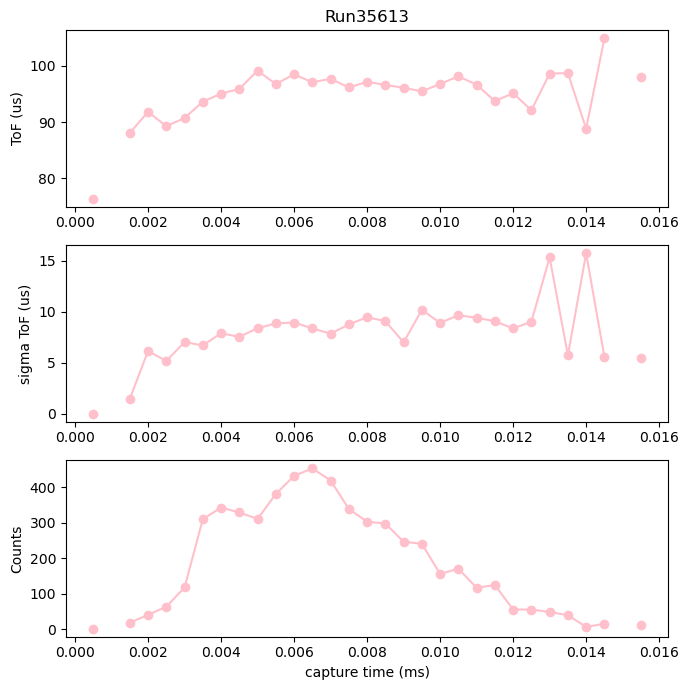

In [4]:
fig, axs = plt.subplots(3, figsize = [7,7])

axs[0].set_title('Run35613')
axs[0].plot(capture_time, ToF, marker = 'o', color='pink')
axs[0].set_ylabel('ToF (us)')

axs[1].plot(capture_time, sigma, marker = 'o', color='pink')
axs[1].set_ylabel('sigma ToF (us)')

axs[2].plot(capture_time, counts, marker = 'o', color='pink')
axs[2].set_ylabel('Counts')
axs[2].set_xlabel('capture time (ms)')

plt.tight_layout()
#plt.savefig('run35613.png', dpi = 200)